### Data transformation and visualiztion note book
#### Section micro

In [1]:
import pandas as pd
import numpy as np

In [2]:
# get the data
a = pd.read_csv('data/forReview_RAoctB.csv')

In [3]:
# this is "record data" each row corresponds to an event:
### each event is a water sample from a location on particular day
#### for each event there are three samples, those three samples get split between three agar plates
##### each plate can have a total result of x_total = x1 + x2 +...+ x6
###### x1 ... x6 are subtotals that can be compared across dates and/or locations
# do the steps to get the descriptive statistics
# create output that can be used by : javaScript, django, bokeh
### at a granularity appropriate to establish an accurate assesment of the laboratory results
a_cols = list(a.columns)
def print_this_list(a):
    for x in a:
        print(x)
print(a_cols)
#check the columns

['Date', 'Location', 'medium', 'Samples', 'Sampling_Notes', 'Water_temp', 'Plating_notes', 'Temp_incubation', 'P1_qty_sample', 'Image_24h_fluo_plate_one', 'P1_fluo_halo_colonies', 'P1_fluo_other', 'Plate_one_24h_image', 'P1_24h_big_blue', 'P1_24h_med_blue', 'P1_24h_green', 'P1_24h_turq', 'P1_24h_pink', 'P1_24h_other', 'Comments_p1_24h', 'Plate_one_48h_image', 'P1_48h_big_blue', 'P1_48h_med_blue', 'P1_48h_green', 'P1_48h_turq', 'P1_48h_pink', 'P1_48h_other', 'Comments_p1_48h', 'P2_qty_sample', 'Image_24h_fluo_plate_two', 'P2_fluo_halo_colonies', 'P2_fluo_other', 'Plate_two_24h_image', 'P2_24h_big_blue', 'P2_24h_med_blue', 'P2_24h_green', 'P2_24h_turq', 'P2_24h_pink', 'P2_24h_other', 'Comments_p2_24h', 'Plate_two_48h_image', 'P2_48h_big_blue', 'P2_48h_med_blue', 'P2_48h_green', 'P2_48h_turq', 'P2_48h_pink', 'P2_48h_other', 'Comments_p2_48h', 'P3_qty_sample', 'Image_24h_fluo_plate_three', 'p3_fluo_halo_colonies', 'p3_fluo_other', 'Plate_three_24h_image', 'P3_24h_big_blue', 'P3_24h_med_blu

In [4]:
# go in a terminal and check the date column
# it is in %y%.m%.d format
# for whatever reason the pd,datetime did not recoginze the data 17.06.12
# it flipped it to : 17.12.06 ---- which wont work
# so use some list index and str properties to make this right
b = a['Date'].copy()
new_dates = []
new_dic = {}
for x in b:
    year = '20'+str(x[6:])
    day = x[:2]
    month = x[3:5]
    new_d = year + '/' + str(month) + '/' + str(day)
    new_dates.append({x:new_d})
    new_dic.update({x:new_d})
new_dates[:10]

a['Date'] = a['Date'].map(new_dic)
a['Date'][:10]

0    2017/06/12
1    2017/06/12
2    2017/06/12
3    2017/06/12
4    2017/06/12
5    2017/06/12
6    2017/06/19
7    2017/06/19
8    2017/06/19
9    2017/06/19
Name: Date, dtype: object

In [5]:
# So there are alot of columns here
# index will be
# 'Date', 'Location', 'medium', 'Samples', 'Sampling_Notes', 'Water_temp', 'Plating_notes', 'Temp_incubation',
# I want that with each record for now

plate_one = ['P1_qty_sample',
             'Image_24h_fluo_plate_one',
             'P1_fluo_halo_colonies',
             'P1_fluo_other',
             'Plate_one_24h_image',
             'P1_24h_big_blue',
             'P1_24h_med_blue',
             'P1_24h_green',
             'P1_24h_turq',
             'P1_24h_pink',
             'P1_24h_other',
             'Comments_p1_24h',
             'Plate_one_48h_image',
             'P1_48h_big_blue',
             'P1_48h_med_blue',
             'P1_48h_green',
             'P1_48h_turq',
             'P1_48h_pink',
             'P1_48h_other',
             'Comments_p1_48h']

In [6]:
plate_two = ['P2_qty_sample',
             'Image_24h_fluo_plate_two',
             'P2_fluo_halo_colonies',
             'P2_fluo_other',
             'Plate_two_24h_image',
             'P2_24h_big_blue',
             'P2_24h_med_blue',
             'P2_24h_green',
             'P2_24h_turq',
             'P2_24h_pink',
             'P2_24h_other',
             'Comments_p2_24h',
             'Plate_two_48h_image',
             'P2_48h_big_blue',
             'P2_48h_med_blue',             
             'P2_48h_green',
             'P2_48h_turq',
             'P2_48h_pink',
             'P2_48h_other',
             'Comments_p2_48h']

In [7]:
plate_three = ['P3_qty_sample',
               'Image_24h_fluo_plate_three',
               'p3_fluo_halo_colonies',
               'p3_fluo_other',
               'Plate_three_24h_image',
               'P3_24h_big_blue',
               'P3_24h_med_blue',
               'P3_24h_green',
               'P3_24h_turq',
               'P3_24h_pink',
               'P3_24h_other',
               'Comments_p3_24h',
               'Plate_three_48h_image',
               'P3_48h_big_blue',
               'P3_48h_med_blue',
               'P3_48h_green',
               'P3_48h_turq',
               'P3_48h_pink',
               'P3_48h_other',
               'Comments_p3_48h'] 

In [8]:
map_it = ['Location','latitude', 'longitude']

In [9]:
index = ['Date',
         'Location',
         'medium',
         'Samples',
         'Sampling_Notes',
         'Water_temp',
         'Plating_notes',
         'Temp_incubation',]

In [10]:
# so the info repeats it self for each plate
# set up lists and variables to keep track of all that
# make sure that all the column names are accounted for
# we have yet to account for 'location_image'
def count_it(a):
    n = 0
    for x in a:
        a = len(x)
        n += a
    return n
groups = [index, map_it, plate_one, plate_two, plate_three]
print(count_it(groups), len(a_cols))
# the count works because the column 'location image' is not included

71 71


In [11]:
loc_image = ['Date', 'Location', 'Location_Image']
groups.append(loc_image)
print(count_it(groups), len(a_cols))
#should be plus three

74 71


In [12]:
# okay onwards
# break the results into time scale (beacuase i can)
# the info repeats it self
# this should get dwon to a series of lists
# if executed in right sequence as variables 
# will extract all possible combinations of the data provided
plate_one_24 = ['P1_qty_sample',
                'Plate_one_24h_image',
                'P1_24h_big_blue',
                'P1_24h_med_blue',
                'P1_24h_green',
                'P1_24h_turq',
                'P1_24h_pink',
                'P1_24h_other',
                'Comments_p1_24h',]
             
plate_one_48 = ['P1_qty_sample',
                'Plate_one_48h_image',
                'P1_48h_big_blue',
                'P1_48h_med_blue',
                'P1_48h_green',
                'P1_48h_turq',
                'P1_48h_pink',
                'P1_48h_other',
                'Comments_p1_48h']


In [13]:
# these can also be constructed using a list index method
plate_two_24 = ['P2_qty_sample',
                'Plate_two_24h_image',
                'P2_24h_big_blue',
                'P2_24h_med_blue',
                'P2_24h_green',
                'P2_24h_turq',
                'P2_24h_pink',
                'P2_24h_other',
                'Comments_p2_24h']

plate_two_48 = ['P2_qty_sample',
                'Plate_two_48h_image',
                'P2_48h_big_blue',
                'P2_48h_med_blue',             
                'P2_48h_green',
                'P2_48h_turq',
                'P2_48h_pink',
                'P2_48h_other',
                'Comments_p2_48h']

In [14]:
plate_three_24 = ['P3_qty_sample',
                  'Plate_three_24h_image',
                  'P3_24h_big_blue',
                  'P3_24h_med_blue',
                  'P3_24h_green',
                  'P3_24h_turq',
                  'P3_24h_pink',
                  'P3_24h_other',
                  'Comments_p3_24h',]
               
plate_three_48 = ['P3_qty_sample',
                  'Plate_three_48h_image',
                  'P3_48h_big_blue',
                  'P3_48h_med_blue',
                  'P3_48h_green',
                  'P3_48h_turq',
                  'P3_48h_pink',
                  'P3_48h_other',
                  'Comments_p3_48h']

In [15]:
plate_one_fluo = ['Image_24h_fluo_plate_one',
                  'P1_fluo_halo_colonies',
                  'P1_fluo_other']
plate_two_fluo = ['Image_24h_fluo_plate_two',
                  'P2_fluo_halo_colonies',
                  'P2_fluo_other']
plate_three_fluo = ['Image_24h_fluo_plate_three',
                    'p3_fluo_halo_colonies',
                    'p3_fluo_other']

In [16]:
# test the list indexes:
d = np.random.randint(9, size=8)
d

array([0, 4, 5, 6, 2, 1, 8, 0])

In [17]:
# or run this at each loop
np.random.choice(9)

8

In [18]:
# this data can be seen as a whole (the sum of all the xis or seperated by incubation time)
plate_groups = [plate_one_24, plate_two_24, plate_three_24, plate_one_48, plate_two_48, plate_three_48]
plate_24 = plate_groups[:3]
plate_48 = plate_groups[3:]

In [19]:
# to check this i will grab a random number and sue it to
# index the lists created from the columns
# these will be used as lables later to call data out
# the out pt should be the same for all values x[i] where i = np.random.choice(9)

def check_indexes(a):
    n = 0
    i = np.random.choice(9)
    if n <= 4:        
        for x in a:
            print(x[i])
        print('loop')
        n += 1
        
check_indexes(plate_groups)
# okay this function can run forever and i get the same output from each group         
        

P1_24h_pink
P2_24h_pink
P3_24h_pink
P1_48h_pink
P2_48h_pink
P3_48h_pink
loop


In [20]:
# group the dates by week number
# first get a sorted list by date
# any way you do it there is a transformation to happen
b = a['Date'].copy()
b = pd.to_datetime(b, format='%Y/%m/%d')
b = list(b)
b.sort()
b = list(set(b))
b.sort()
b
# the time stamp works here but it is a hassel in js
# the value will be kept but I will also asign a week no

[Timestamp('2017-06-12 00:00:00'),
 Timestamp('2017-06-19 00:00:00'),
 Timestamp('2017-06-26 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2017-07-10 00:00:00'),
 Timestamp('2017-07-17 00:00:00'),
 Timestamp('2017-07-24 00:00:00'),
 Timestamp('2017-07-31 00:00:00')]

In [21]:
weeks_l = ['Week one', 'Week two', 'Week three', 'Week four', 'Week five', 'Week six', 'Week seven', 'Week eight']
weeks = dict(zip(weeks_l, b))
print(weeks, b)

{'Week one': Timestamp('2017-06-12 00:00:00'), 'Week two': Timestamp('2017-06-19 00:00:00'), 'Week three': Timestamp('2017-06-26 00:00:00'), 'Week four': Timestamp('2017-07-03 00:00:00'), 'Week five': Timestamp('2017-07-10 00:00:00'), 'Week six': Timestamp('2017-07-17 00:00:00'), 'Week seven': Timestamp('2017-07-24 00:00:00'), 'Week eight': Timestamp('2017-07-31 00:00:00')} [Timestamp('2017-06-12 00:00:00'), Timestamp('2017-06-19 00:00:00'), Timestamp('2017-06-26 00:00:00'), Timestamp('2017-07-03 00:00:00'), Timestamp('2017-07-10 00:00:00'), Timestamp('2017-07-17 00:00:00'), Timestamp('2017-07-24 00:00:00'), Timestamp('2017-07-31 00:00:00')]


In [22]:
# makesure the orignal df is up to speed
a['Date'] = pd.to_datetime(a['Date'],format='%Y/%m/%d' )

In [23]:
# create a list of place names
places = list(a['Location'].copy())
places = set(places)
place = list(places)
place

['Echandens',
 'Hackuarium tap',
 'MRD',
 'SVT',
 'Nernier',
 'VNX',
 'Hackuarium toilet']

In [24]:
mediums = list(a['medium'].unique().copy())
mediums[0]

'easy_gel'

In [25]:
place = ['Echandens',
         'SVT',
         'VNX',
         'MRD',
         'Nernier',
         'Hackuarium tap',
         'Hackuarium toilet']

# so now I should get a table of values
# corresponding to plate number and color for one date, and one location
# check to see what happens if use 1 of each list to slice the data-frame
c = a[(a.Location == place[4]) & (a.Date == weeks['Week one'])][[plate_one_24[2], plate_two_24[2], plate_three_24[2]]]

In [26]:
c

,P1_24h_big_blue,P2_24h_big_blue,P3_24h_big_blue
4,1.0,0.0,0.0


In [27]:
print(type(c))
# that output looks good
# create a list index for the plate counts
bugs = [2, 3, 4, 5, 6, 7]
# this is temporary and will be replaced with a list derived from the column names
# this information down here is good to know

<class 'pandas.core.frame.DataFrame'>


In [28]:
# there is already some pandas finctionality here
a_sum = c.sum()
b_sum = sum(a_sum)
c_sum = sum(c.sum())

print(c_sum)
print(a_sum)

1.0
P1_24h_big_blue    1.0
P2_24h_big_blue    0.0
P3_24h_big_blue    0.0
dtype: float64


In [29]:
# this function produces a dict of results
# of the type {placeName:{weeknumber-i, color-i,total-i}...{weeknumber-n, color-n,total-n}}
# and gets the color names
# this could be used in most js charting libraries
#

n = {}
def results(w,x,y,z,v):
    #f = []
    #l = []
    m ={}
    o = []
    #g = []
    for key, value in w.items():
        for i in z:
            total = 0
            for plate in y:
                c = a[(a.Location == x) & (a.medium == v) & (a.Date == value)][plate[i]]
                total += c.sum()
                d = {'date': key, 'bug':str(plate[i]),'colonies':c.sum()}
                #print(d)
                #f.append(d)
            if str(plate[i][7:]) not in o:
                   o.append(str(plate[i][7:]))
            h = {'week':str(key), 'color':str(plate[i][7:]), 'total':total}
            #print(h)
            m.update({(x, str(key), str(plate[i][7:])):h})
    n.update({x:m})
                       
    return  n, o

#v, w, m, n= results(weeks,'VNX', plate_24, bugs)

In [30]:
# it runs long, check and see if there are pandas methods
# groupby comes to mind ---- to speed this up
for x in place:
    n, o = results(weeks,x, plate_24, bugs, mediums[0])
    
    

In [31]:
# so there are seven dicts with 48 dicts nested in each one
# the number makes sense
len(n), len(n['SVT'])

(7, 48)

In [32]:
# this is sufficient to mark a chart
# it is easier to remember and shorter to type
o

['big_blue', 'med_blue', 'green', 'turq', 'pink', 'other']

In [33]:
# calling all the varaibles (inlcuding the new one)
# produces a result
# yay !!
print(str(place[1]), n[place[1]][(str(place[1]),weeks_l[1],'med_blue')])

SVT {'week': 'Week two', 'color': 'med_blue', 'total': 0.0}


In [34]:
# so use that to get weekly totals
def week_total_all(dic_t, place, week, bug):
    b = {}
    for beach in place:
        #print(beach)
        a = dic_t[beach]
        for date in week:
            total = 0
            for color in bug:
                #print(a[(beach, date, color)])
                total += a[(beach, date, color)]['total']
            #print(beach, date, str(total))
            b.update({(beach, date):total})
    return b
        
g = week_total_all(n, place, weeks_l, o)

In [35]:
# now I can start to get descriptive statistics and visualisations
# seperated by date, location, incubation time, plate number, color
# and have output that is almost ready to go for charting (js date and float parse on the browser)
# but is good for plotting in matplotlib
#g

In [36]:
import matplotlib
import matplotlib.pyplot as plt
def plot_weekly_totals(wks, plc, g):
    rows = len(wks)
    cols = len(plc) +1

    f, axar = plt.subplots(rows, cols, figsize=(18,14))
    f.subplots_adjust(hspace=0.6, wspace=0.3)

    for i, n in enumerate(wks):
        axar[i, 0].text(0, 0.5, n, fontsize=14)
        axar[i, 0].set_axis_off()
        for j, o in enumerate(plc):
            axar[i, j+1].bar(1, g[(o, n)],)
            axar[i, j+1].set_title(o)
            axar[i, j+1].set_ylim(0, g[(o, n)]+20)

    plt.show()


## Grid plot of weekly totals for all colors and place names in data
## incubation time 24hours, medium: easy-gel

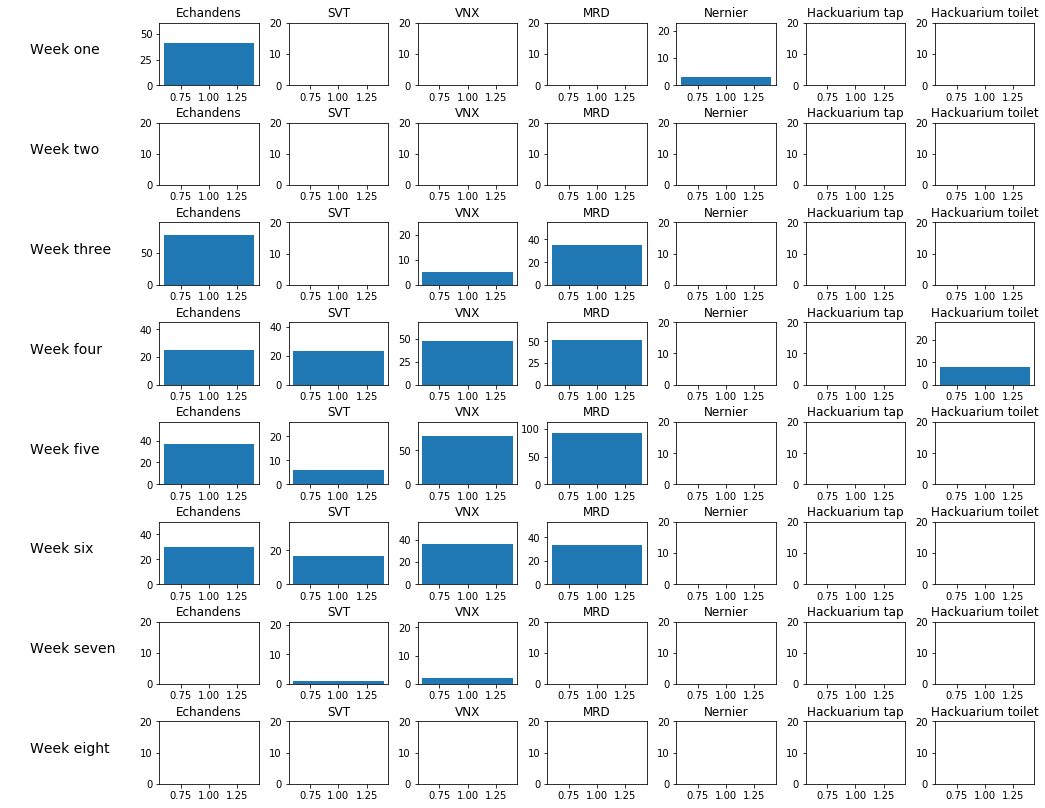

In [37]:
plot_weekly_totals(weeks_l, place, g)

In [38]:
# lets get total coliforms per week, per location
coliforms = o[:2]
coli_week = week_total_all(n, place, weeks_l, coliforms)

## Grid plot of weekly total (med_blue + big_blue) for all colors and place names
## incubation time 24hours, medium: easy-gel

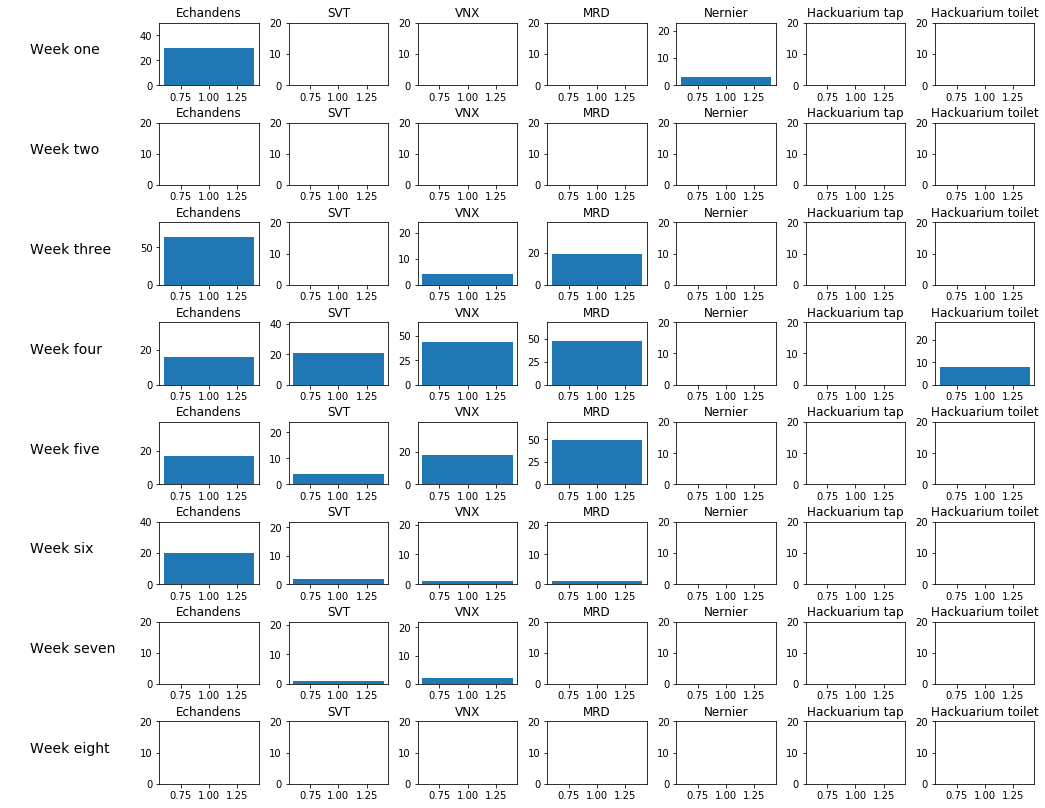

In [39]:
plot_weekly_totals(weeks_l, place, coli_week)

In [40]:
# so the output for the charts need to match the output from the data frame
# set up the conditions
# test one location at a time

In [41]:
# pull the data frame using the variables in the function
ee = a[(a.Location == 'SVT') & (a.medium == 'easy_gel')].copy()
ww = [plate_one_24, plate_two_24, plate_three_24]


In [42]:
ee.reset_index(inplace = True)
ee.set_index(index, inplace=True)

In [43]:
col_list = []
for plts in ww:
    col_list.append(plts[2])
    col_list.append(plts[3])


In [44]:
ff = ee[col_list].copy()

In [45]:
ff['total'] = ff[col_list].sum(axis=1)

In [46]:
ff['total'].values

array([ 0.,  0.,  0., 21.,  4.,  2.,  1.,  0.])

In [47]:
for x in weeks_l:
    hh = coli_week[('SVT', x)]
    print(hh)

0.0
0.0
0.0
21.0
4.0
2.0
1.0
0.0


In [48]:
mediums[1]

'micrology_card'

## Grid plot of weekly totals for all colors and place names in data
## incubation time 24hours, medium: micrology-card

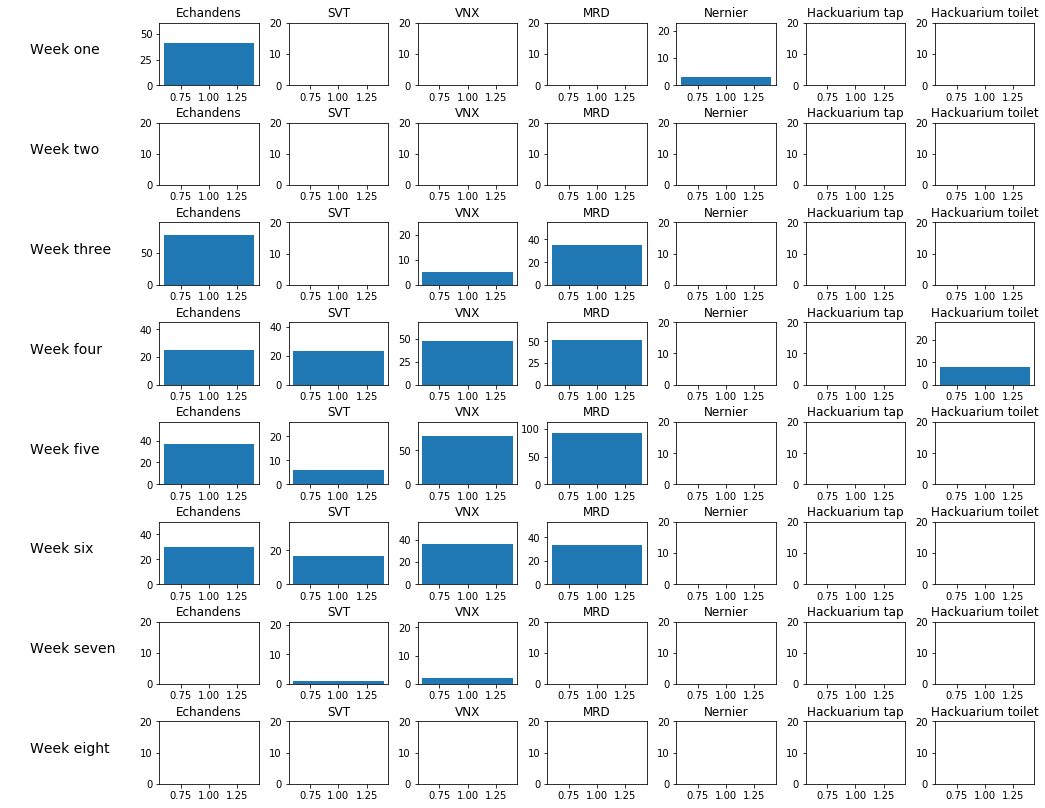

In [49]:
micrology, o = results(weeks,x, plate_24, bugs, mediums[1])
microl = week_total_all(micrology, place, weeks_l, o)
plot_weekly_totals(weeks_l, place, microl)

## Grid plot of weekly totals for (med_blue + big_blue) colors and all place names in data
## incubation time 24hours, medium: micrology-card

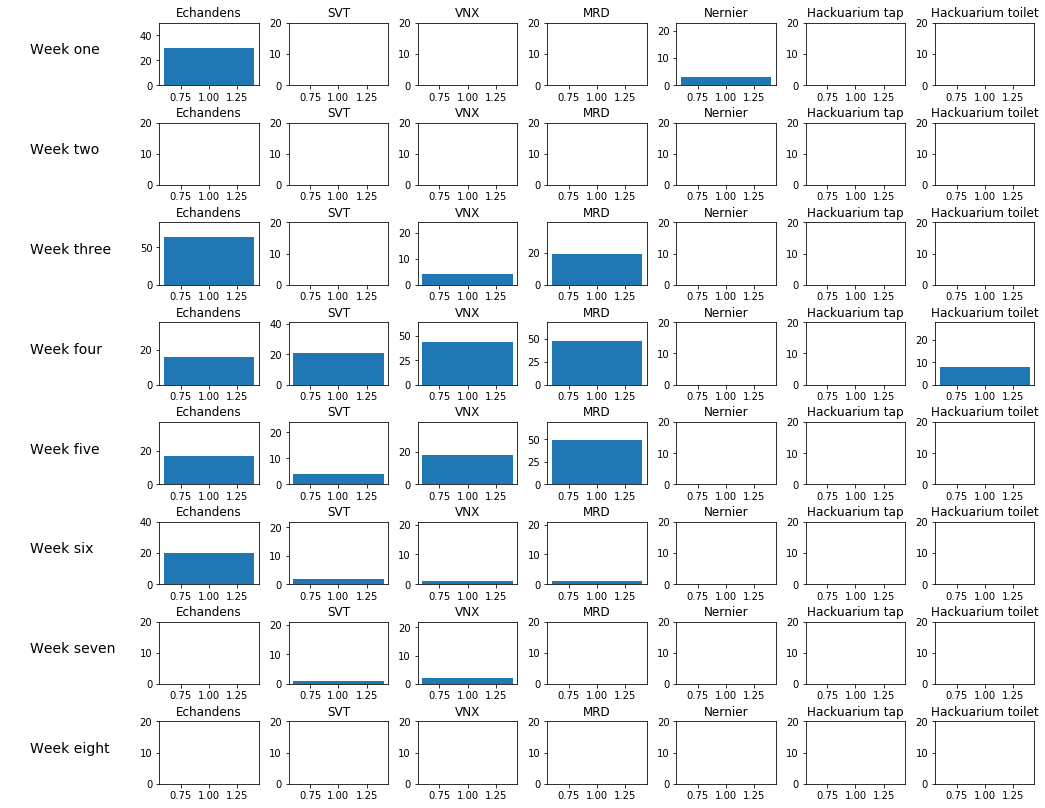

In [50]:
micro_week = week_total_all(micrology, place, weeks_l, coliforms)
plot_weekly_totals(weeks_l, place, coli_week)